In [1]:
import gymnasium as gym
import numpy as np
import math
import matplotlib.pyplot as plt 
import pygame

In [2]:
env = gym.make("CartPole-v1")

In [3]:
print("Límites superiores:", env.observation_space.high)	
print("Límites inferiores:", env.observation_space.low)	
print("Número de acciones disponibles:", env.action_space.n)           

Límites superiores: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
Límites inferiores: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Número de acciones disponibles: 2


In [4]:
episodes = 1000
discount = 0.95
episodes_display = 10
learning_rate = 0.25
epsilon = 0.2

In [5]:
theta_minmax = env.observation_space.high[2] #se accede al tercer elemento del sistema (ángulo del poste)
theta_dot_minmax = math.radians(50) #convertimos el valor de grados a radianes para asegurarnos que este en la misma
                                    #escala que la observación del entorno

theta_state_size = 50 #dividimos el rango de ángulos que puede tomar el poste en 50 partes iguales
theta_dot_state_size = 50 #lo mismo para la velocidad

#Inicializamos la tabla Q con valores aleatorios
q_table = np.random.randn(theta_state_size,theta_dot_state_size,env.action_space.n)

In [8]:
#Para almacenar las recompensas totales:
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

In [9]:
def discretised_state(state):
    # state[2] -> ángulo (theta)
    # state[3] -> velocidad angular (theta_dot)
    discrete_state = np.array([0, 0])  # Inicializamos un array para discretizar

    # Discretización del ángulo (theta)
    theta_window = (theta_minmax - (-theta_minmax)) / theta_state_size
    discrete_state[0] = int((state[2] - (-theta_minmax)) // theta_window)
    discrete_state[0] = min(theta_state_size - 1, max(0, discrete_state[0]))

    # Discretización de la velocidad angular (theta_dot)
    theta_dot_window = (theta_dot_minmax - (-theta_dot_minmax)) / theta_dot_state_size
    discrete_state[1] = int((state[3] - (-theta_dot_minmax)) // theta_dot_window)
    discrete_state[1] = min(theta_dot_state_size - 1, max(0, discrete_state[1]))

    # Retorno del estado
    return tuple(discrete_state.astype(int))

In [10]:
for episode in range(episodes):
    episode_reward = 0
    state_array = env.reset()[0]  # Obtener solo el array del estado
    curr_discrete_state = discretised_state(state_array)  # Estado inicial del entorno discretizado
    done = False
    i = 0  # Contador para el paso del tiempo
    
    # Determinar si se debe renderizar el estado en este episodio
    if episode % episodes_display == 0:
        render_state = True
    else:
        render_state = False

    while not done:
        if np.random.random() > epsilon: # Decide si el agente debe realizar una acción aleatoria o seleccionar la acción óptima basada en el valor Q actual   
            action = np.argmax(q_table[curr_discrete_state]) # Acción óptima
        else:
            action = np.random.randint(0, env.action_space.n) # Acción aleatoria
        
        # Obtener el resultado del paso
        new_state_array, reward, done, _, _ = env.step(action)  # Quitamos los valores no utilizados
        new_discrete_state = discretised_state(new_state_array)
        
        # Renderizar el estado si es necesario
        if render_state:
            env.render()

        # Actualizar la tabla Q
        if not done:
            max_future_q = np.max(q_table[new_discrete_state]) # Valor máximo esperado de todas las acciones posibles
            current_q = q_table[curr_discrete_state[0], curr_discrete_state[1], action] # Valor Q actual asociado con la acción actual
            new_q = current_q + learning_rate * (reward + discount * max_future_q - current_q) # Actualizar los valores en la tabla Q
            
            q_table[curr_discrete_state[0], curr_discrete_state[1], action] = new_q
    
        i += 1
        curr_discrete_state = new_discrete_state
        episode_reward += reward

    ep_rewards.append(episode_reward)
    
    if not episode % episodes_display: 
        avg_reward = sum(ep_rewards[-episodes_display:])/len(ep_rewards[-episodes_display:]) #si el número actual es divisible, mostrar resultado        
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-episodes_display:]))
        ep_rewards_table['max'].append(max(ep_rewards[-episodes_display:]))          
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-episodes_display:])} max:{max(ep_rewards[-episodes_display:])}")


env.close()


Episode:0 avg:22.0 min:22.0 max:22.0
Episode:10 avg:24.2 min:10.0 max:46.0
Episode:20 avg:23.3 min:10.0 max:47.0
Episode:30 avg:31.0 min:17.0 max:67.0
Episode:40 avg:35.0 min:10.0 max:85.0
Episode:50 avg:20.2 min:12.0 max:31.0
Episode:60 avg:27.5 min:13.0 max:64.0
Episode:70 avg:19.2 min:10.0 max:33.0
Episode:80 avg:23.9 min:10.0 max:58.0
Episode:90 avg:23.1 min:12.0 max:48.0
Episode:100 avg:30.5 min:15.0 max:62.0
Episode:110 avg:19.5 min:13.0 max:35.0
Episode:120 avg:19.8 min:12.0 max:34.0
Episode:130 avg:22.5 min:12.0 max:35.0
Episode:140 avg:15.6 min:10.0 max:30.0
Episode:150 avg:21.2 min:12.0 max:37.0
Episode:160 avg:30.5 min:15.0 max:101.0
Episode:170 avg:45.1 min:18.0 max:89.0
Episode:180 avg:26.0 min:14.0 max:47.0
Episode:190 avg:29.0 min:12.0 max:65.0
Episode:200 avg:22.3 min:12.0 max:47.0
Episode:210 avg:20.6 min:9.0 max:42.0
Episode:220 avg:34.2 min:14.0 max:69.0
Episode:230 avg:21.6 min:9.0 max:34.0
Episode:240 avg:22.8 min:9.0 max:46.0
Episode:250 avg:27.0 min:14.0 max:51.0

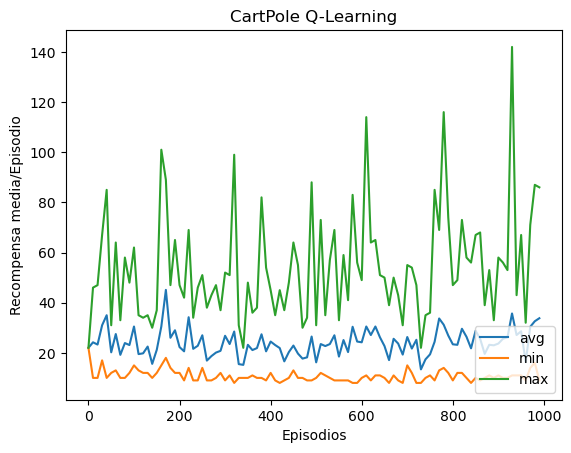

In [11]:
#Representamos en gráfico
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4)
plt.title('CartPole Q-Learning')
plt.ylabel('Recompensa media/Episodio')
plt.xlabel('Episodios')
plt.show()

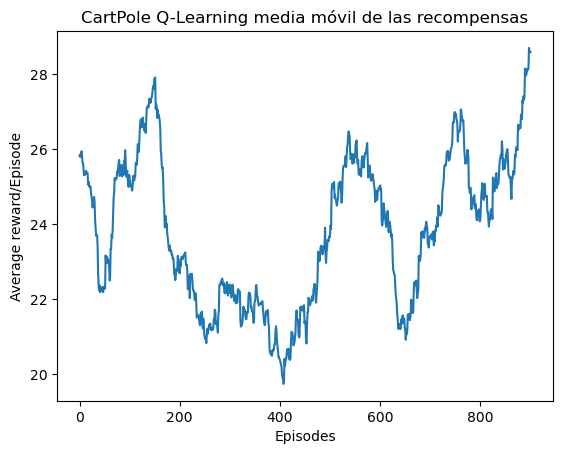

In [12]:
window_size = 100
# A continuación, se multiplican los valores de la ventana por los valores de la recompensas obtenidas y posteriormente
# se suma todo
moving_avg_rewards = np.convolve(ep_rewards, np.ones(window_size)/window_size, mode='valid') #para que todos los valores en la ventana sumen 1
                                                                 # mode=valid para que solo multiplique aquellas secuencias que se superpongan
                                                                # completamente.

# Graficamos la recompensa promedio móvil
plt.plot(np.arange(len(moving_avg_rewards)), moving_avg_rewards)
plt.title('CartPole Q-Learning media móvil de las recompensas')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()

In [13]:
# Calculate the convergence rate
convergence_rate = (ep_rewards_table['avg'][-1] - ep_rewards_table['avg'][0]) / len(ep_rewards_table['avg'])
print("Tasa de convergencia:", convergence_rate)


Tasa de convergencia: 0.11799999999999997
